In [53]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D2%20-%20bis/IMDB%20Movies%20Dataset%20folder.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

# Loading and Inspecting Dataset

In [54]:
# Load the set
df = pd.read_csv('.\data\imdb_top_1000.csv')

print(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None                                 

In [55]:
# Drop Irrelevant Columns
df = df.drop(columns=['Poster_Link', 'Certificate', 'Overview'])

# Data Preprocessing

## Datatype Conversions

In [56]:
# Simple Column Data Conversions
# Convert Released Year to int
print(df['Released_Year'].value_counts()) # There is a movie where released year is 'PG'

# Retrieve the row and change value to desired year
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

# Check Update
movie = df[df['Series_Title'] == 'Apollo 13']
print(movie)

# Convert Entire Column to int
df['Released_Year'] = df['Released_Year'].astype('int64')

df.info()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
PG       1
Name: count, Length: 100, dtype: int64
    Series_Title Released_Year  Runtime                      Genre  \
966    Apollo 13          1995  140 min  Adventure, Drama, History   

     IMDB_Rating  Meta_score    Director      Star1        Star2        Star3  \
966          7.6        77.0  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon   

           Star4  No_of_Votes        Gross  
966  Gary Sinise       269197  173,837,933  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score   

In [57]:
# Convert Runtime to Int
df['Runtime'] = df['Runtime'].str.replace('min', '').str.strip().astype(int)

In [58]:
# Convert Gross to Int
# Check for and fill missing values
print('Missing Rows Before:', df['Gross'].isnull().sum())
df['Gross'] = df['Gross'].fillna('0,')
print('Missing Rows After:', df['Gross'].isnull().sum())

# Convert Column Datatype
df['Gross'] = df['Gross'].str.replace(',', '').astype('float64')

# Change the 0 values back to null
df['Gross'] = df['Gross'].replace(0, np.nan)

Missing Rows Before: 169
Missing Rows After: 0


In [59]:
# Change 'Genre' Column to Category Type
df['Genre'] = df['Genre'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Series_Title   1000 non-null   object  
 1   Released_Year  1000 non-null   int64   
 2   Runtime        1000 non-null   int64   
 3   Genre          1000 non-null   category
 4   IMDB_Rating    1000 non-null   float64 
 5   Meta_score     843 non-null    float64 
 6   Director       1000 non-null   object  
 7   Star1          1000 non-null   object  
 8   Star2          1000 non-null   object  
 9   Star3          1000 non-null   object  
 10  Star4          1000 non-null   object  
 11  No_of_Votes    1000 non-null   int64   
 12  Gross          831 non-null    float64 
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 105.5+ KB


## Missing Values

### Gross Column

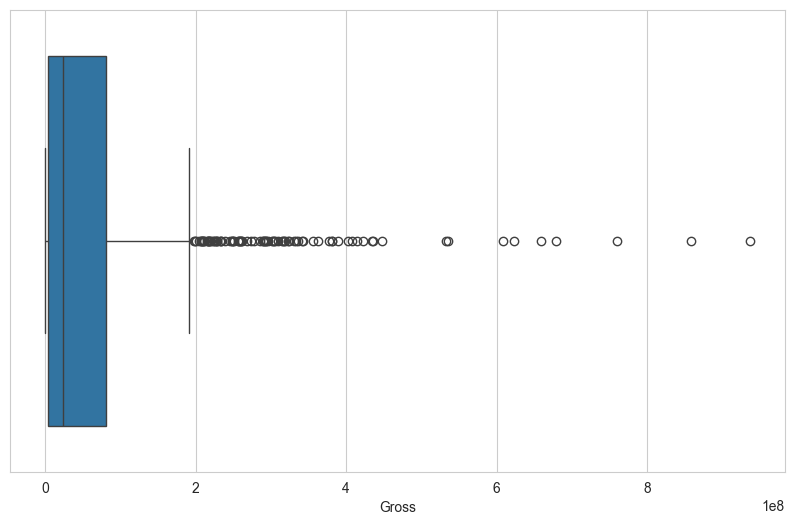

In [60]:
# Understand Current Distribution of Gross Column
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Gross'], orient='h')
plt.show()

# The 'Gross' Column is heavily Skewed to the right

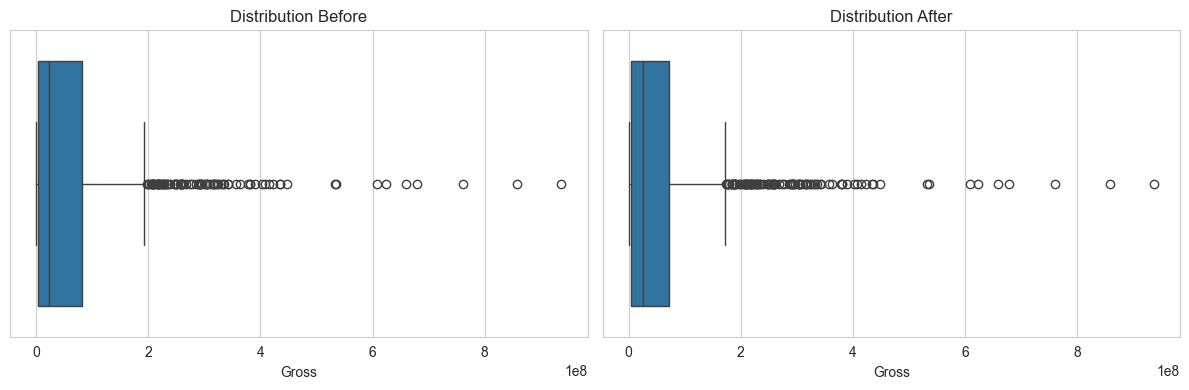

In [61]:
# Handle Missing Values for Gross using Group-Based Imputation
df_before = df.copy()
df['Gross'] = df.groupby('Released_Year')['Gross'].transform(lambda x: x.fillna(x.median()))

# Handle the Rest with Global Median
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Plot Before and After 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Set Left Plot
sns.boxplot(x='Gross', data=df_before, ax=ax1, orient='h')
ax1.set_title('Distribution Before')

# Set Right Plot
sns.boxplot(x='Gross', data=df, ax=ax2, orient='h')
ax2.set_title('Distribution After')

plt.tight_layout()
plt.show()


### Meta_Score Column

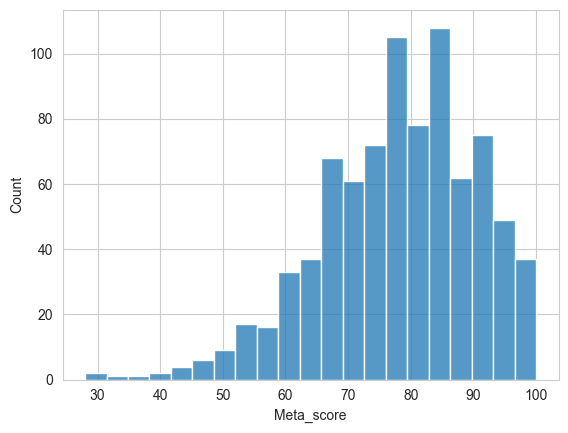

In [62]:
# Visualize the Distribution
sns.histplot(df['Meta_score'])
plt.show()

# Slight skew to the left, therefore median fill is preferred

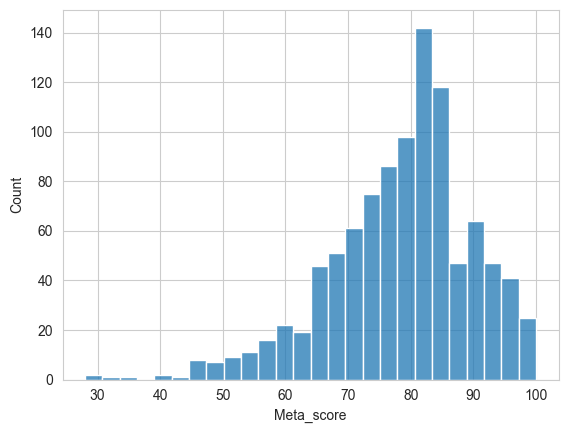

In [63]:
# Handle Missing Values for Gross using Group-Based Imputation
df['Meta_score'] = df.groupby('IMDB_Rating')['Meta_score'].transform(lambda x: x.fillna(x.median()))

sns.histplot(df['Meta_score'])
plt.show()

### Final Info Check

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Series_Title   1000 non-null   object  
 1   Released_Year  1000 non-null   int64   
 2   Runtime        1000 non-null   int64   
 3   Genre          1000 non-null   category
 4   IMDB_Rating    1000 non-null   float64 
 5   Meta_score     1000 non-null   float64 
 6   Director       1000 non-null   object  
 7   Star1          1000 non-null   object  
 8   Star2          1000 non-null   object  
 9   Star3          1000 non-null   object  
 10  Star4          1000 non-null   object  
 11  No_of_Votes    1000 non-null   int64   
 12  Gross          1000 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 105.5+ KB


# Analysis

## Rating Trends Over the Years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  99 non-null     int64  
 1   IMDB_Rating    99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


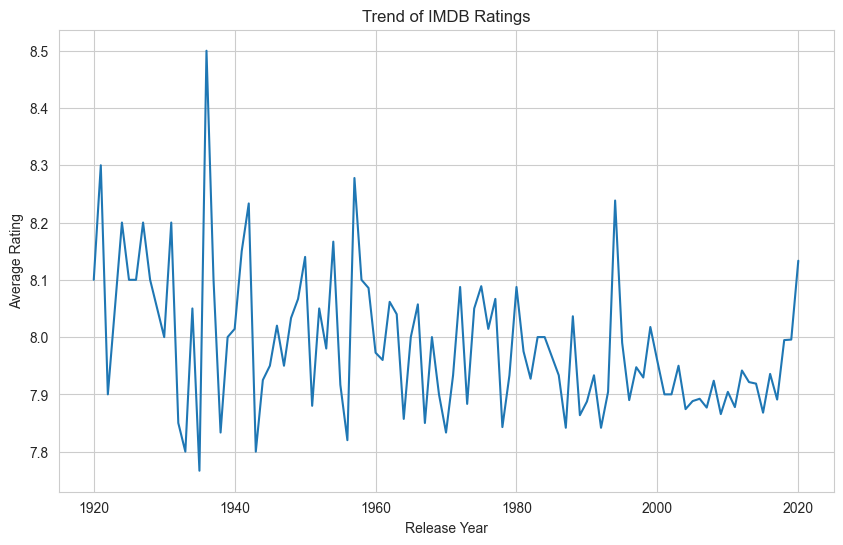

In [65]:
# Aggregate Ratings by Year
ratings = df.groupby('Released_Year')['IMDB_Rating'].agg('mean').reset_index()

ratings.info()

# Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
plt.figure(figsize=(10,6))
plt.plot(ratings['Released_Year'], ratings['IMDB_Rating'])
plt.title('Trend of IMDB Ratings')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

## Genre Popularity Analysis

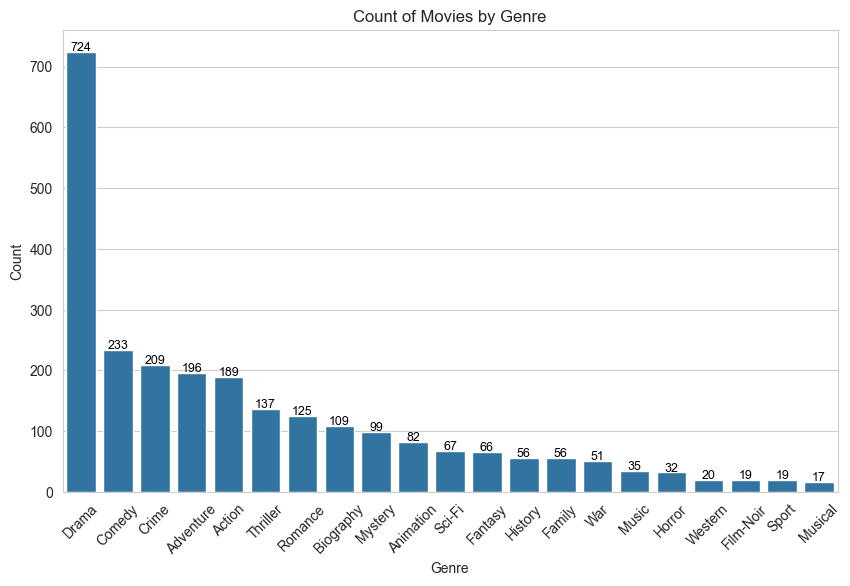

In [66]:
# Given 'Genre' column has comma-separated genres
df['genre_list'] = df['Genre'].str.split(', ')

# Explode so each genre has its own row
df_exploded = df.explode('genre_list')

# Create Dataframe of the counts of each genre
genre_counts = df_exploded['genre_list'].value_counts().reset_index()

# Use Seaborn to Plot this information
plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, x='genre_list', y='count')

# Add Labels to Each Bar
for i, val in enumerate(genre_counts['count']):
    plt.text(i, val + max(genre_counts['count'])*0.01, f"{val}", va='center', ha='center', fontsize=9, color='black')

plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Director’s Impact on Ratings

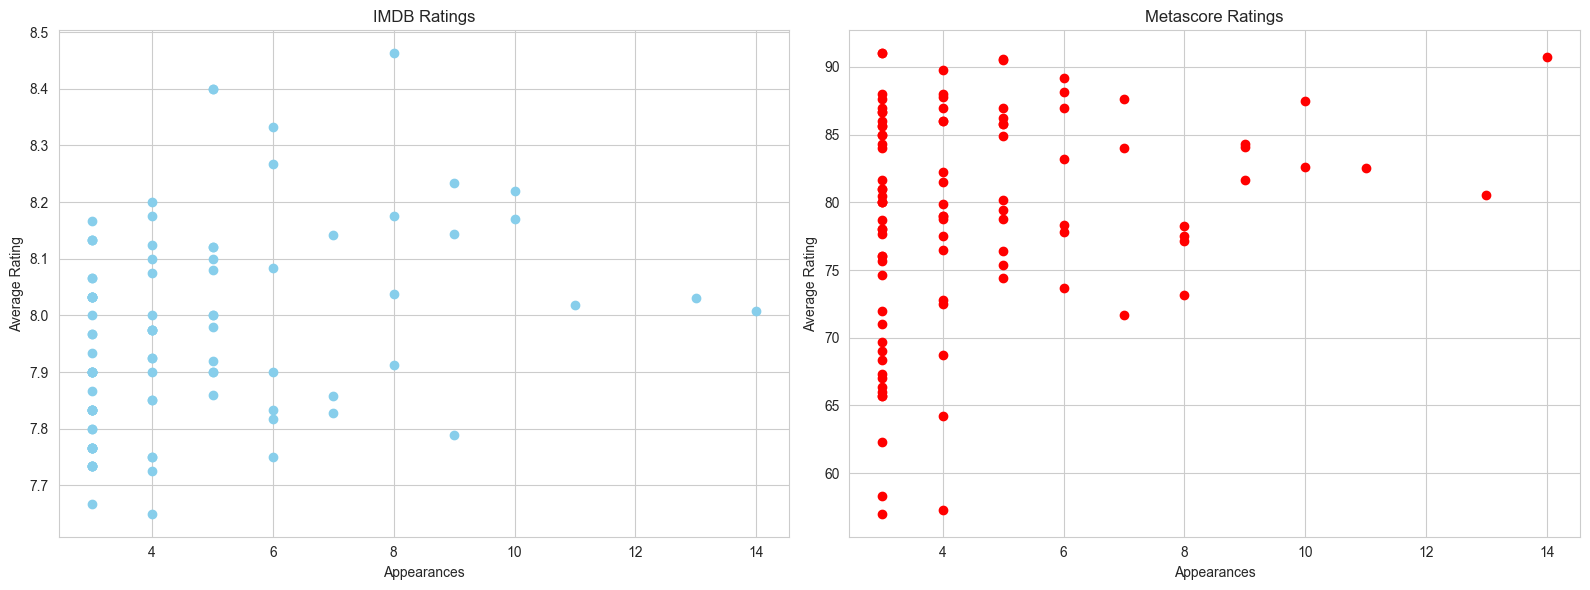

In [67]:
# Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings
# Dataframe of Average Ratings of each Director
director_ratings = df.groupby('Director')[['IMDB_Rating', 'Meta_score']].mean().reset_index()

# Count of Director in Top 1,000 Movies List
director_appearances = df['Director'].value_counts()

# Merge into New Dataframe
director_details = pd.merge(director_ratings, director_appearances, on='Director')

# Sort by count of Director
sorted = director_details.sort_values('count', ascending=True)

# Filter to Show Directors with only 3 or more movies on the list
condition = sorted['count'] >= 3
sorted = sorted[condition]

# Use Matplotlib Scatterplot to see the relationship between director and movies
fig, axes = plt.subplots(1, 2, figsize=(16,6))
x = sorted['count']

# --- Left Figure: IMDB Ratings ---
ax1 = axes[0]
ax1.scatter(x, sorted['IMDB_Rating'], color='skyblue')
ax1.set_title('IMDB Ratings')
ax1.set_xlabel('Appearances')
ax1.set_ylabel('Average Rating')

# --- Right Figure: Metascore Ratings ---
ax2 = axes[1]
ax2.scatter(x, sorted['Meta_score'], color='red')
ax2.set_title('Metascore Ratings')
ax2.set_xlabel('Appearances')
ax2.set_ylabel('Average Rating')

plt.tight_layout()
plt.show()




## Star Power Analysis

In [68]:
# First, we should converge all the stars into a single column
df["Stars"] = df[["Star1", "Star2", "Star3", "Star4"]].values.tolist()

# Next we can drop the 4 Star Columns
df = df.drop(columns=["Star1", "Star2", "Star3", "Star4"])

# Explode the Dataframe so each actor has their own row
df_explode = df.explode('Stars')

# Create a new Dataframe of the counts of each actor
actors = df_explode['Stars'].value_counts().reset_index()

# Create another DataFrame with the Average IMDB Rating/Gross for each Actor
actor_details = df_explode.groupby('Stars')[['IMDB_Rating', 'Gross']].mean().reset_index()

# Merge the Dataframes
star_power = pd.merge(actors, actor_details, on='Stars')

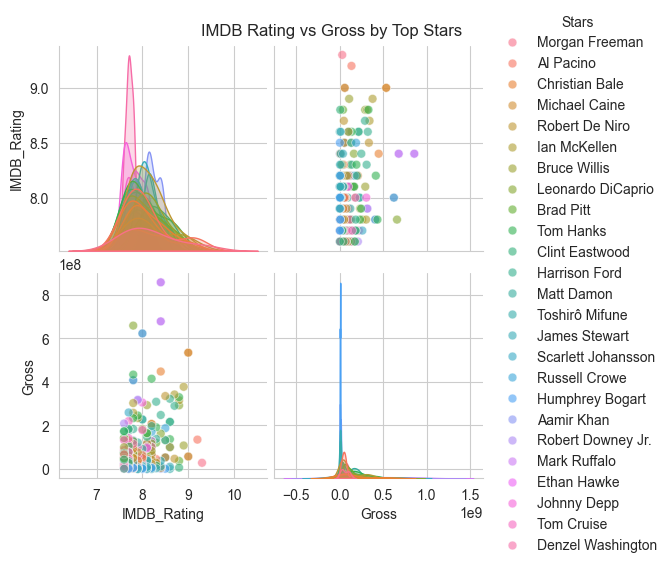

In [69]:
# Filter to only include top 25 actors
top_stars = df_explode['Stars'].value_counts().head(25).index
filtered = df_explode[df_explode['Stars'].isin(top_stars)]

# Create Pairplot to Visualize the Relationship Between Star and Ratings/Gross
sns.pairplot(
    filtered,
    vars=['IMDB_Rating', 'Gross'],
    hue='Stars',
    diag_kind='kde',
    plot_kws={'alpha':0.6, 's':40}
)
plt.suptitle("IMDB Rating vs Gross by Top Stars", y=1.02)
plt.show()

## Box Plot of Genres vs. Ratings

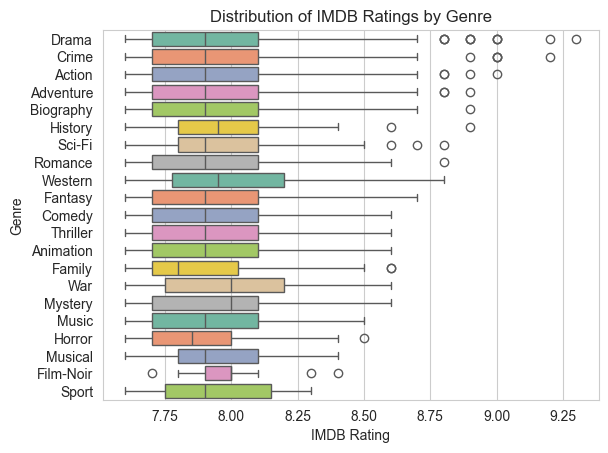

In [70]:
# Drop Previous 'Genre' Column from DF
df = df.drop(columns='Genre')

# Create an Exploded DF based on Genre
df_exploded = df.explode('genre_list')

# Use Exploded DF to create boxplot for each genre
sns.boxplot(data=df_exploded, x='IMDB_Rating', y='genre_list', orient='h', palette='Set2')
plt.title('Distribution of IMDB Ratings by Genre')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.show()

## Correlation Heatmap

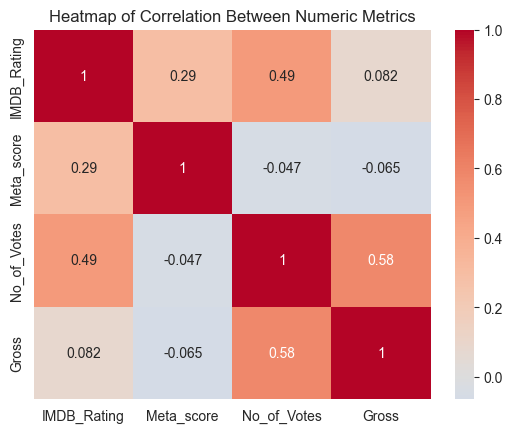

In [71]:
# Calculate Correlation Matrix
cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
corr_matrix = df[cols].corr()

# Create a heatmap using Seaborn to identify correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Between Numeric Metrics')
plt.show()